In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from time import time

In [ ]:
df = pd.read_csv("/content/world_population.csv")
df

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [ ]:
df = df.dropna()

In [ ]:
df_melt = pd.melt(df, id_vars=['Rank','CCA3','Country/Territory','Capital','Continent','Area (km²)',
                               'Density (per km²)','Growth Rate','World Population Percentage'],
                       var_name='Year', value_name='Total_Pop')

df_melt

,Rank,CCA3,Country/Territory,Capital,Continent,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Year,Total_Pop
0,36,AFG,Afghanistan,Kabul,Asia,652230,63.0587,1.0257,0.52,2022 Population,41128771
1,138,ALB,Albania,Tirana,Europe,28748,98.8702,0.9957,0.04,2022 Population,2842321
2,34,DZA,Algeria,Algiers,Africa,2381741,18.8531,1.0164,0.56,2022 Population,44903225
3,213,ASM,American Samoa,Pago Pago,Oceania,199,222.4774,0.9831,0.00,2022 Population,44273
4,203,AND,Andorra,Andorra la Vella,Europe,468,170.5641,1.0100,0.00,2022 Population,79824
...,...,...,...,...,...,...,...,...,...,...,...
1867,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,142,81.4930,0.9953,0.00,1970 Population,9377
1868,172,ESH,Western Sahara,El Aaiún,Africa,266000,2.1654,1.0184,0.01,1970 Population,76371
1869,46,YEM,Yemen,Sanaa,Asia,527968,63.8232,1.0217,0.42,1970 Population,6843607
1870,63,ZMB,Zambia,Lusaka,Africa,752612,26.5976,1.0280,0.25,1970 Population,4281671


In [ ]:
df_melt['Year'] = df_melt['Year'].str.replace('Population','', regex=False)
df_melt

,Rank,CCA3,Country/Territory,Capital,Continent,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Year,Total_Pop
0,36,AFG,Afghanistan,Kabul,Asia,652230,63.0587,1.0257,0.52,2022,41128771
1,138,ALB,Albania,Tirana,Europe,28748,98.8702,0.9957,0.04,2022,2842321
2,34,DZA,Algeria,Algiers,Africa,2381741,18.8531,1.0164,0.56,2022,44903225
3,213,ASM,American Samoa,Pago Pago,Oceania,199,222.4774,0.9831,0.00,2022,44273
4,203,AND,Andorra,Andorra la Vella,Europe,468,170.5641,1.0100,0.00,2022,79824
...,...,...,...,...,...,...,...,...,...,...,...
1867,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,142,81.4930,0.9953,0.00,1970,9377
1868,172,ESH,Western Sahara,El Aaiún,Africa,266000,2.1654,1.0184,0.01,1970,76371
1869,46,YEM,Yemen,Sanaa,Asia,527968,63.8232,1.0217,0.42,1970,6843607
1870,63,ZMB,Zambia,Lusaka,Africa,752612,26.5976,1.0280,0.25,1970,4281671


In [ ]:
df_melt['Years'] = pd.to_datetime(df_melt['Year'], errors = 'coerce')
df_melt['Total_Pop'] = pd.to_numeric(df_melt['Total_Pop'], errors = 'coerce')
df_melt


<ipython-input-54-a4911d06e7c3>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melt['Years'] = pd.to_datetime(df_melt['Year'], errors = 'coerce')


,Rank,CCA3,Country/Territory,Capital,Continent,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Year,Total_Pop,Years
0,36,AFG,Afghanistan,Kabul,Asia,652230,63.0587,1.0257,0.52,2022,41128771,2022-01-01
1,138,ALB,Albania,Tirana,Europe,28748,98.8702,0.9957,0.04,2022,2842321,2022-01-01
2,34,DZA,Algeria,Algiers,Africa,2381741,18.8531,1.0164,0.56,2022,44903225,2022-01-01
3,213,ASM,American Samoa,Pago Pago,Oceania,199,222.4774,0.9831,0.00,2022,44273,2022-01-01
4,203,AND,Andorra,Andorra la Vella,Europe,468,170.5641,1.0100,0.00,2022,79824,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1867,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,142,81.4930,0.9953,0.00,1970,9377,1970-01-01
1868,172,ESH,Western Sahara,El Aaiún,Africa,266000,2.1654,1.0184,0.01,1970,76371,1970-01-01
1869,46,YEM,Yemen,Sanaa,Asia,527968,63.8232,1.0217,0.42,1970,6843607,1970-01-01
1870,63,ZMB,Zambia,Lusaka,Africa,752612,26.5976,1.0280,0.25,1970,4281671,1970-01-01


In [ ]:
df_melt['Years'] = df_melt['Years'].apply(lambda x: x.year)
df_melt

,Rank,CCA3,Country/Territory,Capital,Continent,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Year,Total_Pop,Years
0,36,AFG,Afghanistan,Kabul,Asia,652230,63.0587,1.0257,0.52,2022,41128771,2022
1,138,ALB,Albania,Tirana,Europe,28748,98.8702,0.9957,0.04,2022,2842321,2022
2,34,DZA,Algeria,Algiers,Africa,2381741,18.8531,1.0164,0.56,2022,44903225,2022
3,213,ASM,American Samoa,Pago Pago,Oceania,199,222.4774,0.9831,0.00,2022,44273,2022
4,203,AND,Andorra,Andorra la Vella,Europe,468,170.5641,1.0100,0.00,2022,79824,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
1867,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,142,81.4930,0.9953,0.00,1970,9377,1970
1868,172,ESH,Western Sahara,El Aaiún,Africa,266000,2.1654,1.0184,0.01,1970,76371,1970
1869,46,YEM,Yemen,Sanaa,Asia,527968,63.8232,1.0217,0.42,1970,6843607,1970
1870,63,ZMB,Zambia,Lusaka,Africa,752612,26.5976,1.0280,0.25,1970,4281671,1970


In [ ]:
df_melt_copy = df_melt
df_melt = df_melt.loc[:, ['Rank',	'CCA3',	'Country/Territory',	'Capital',	'Continent',	'Years','Total_Pop' ,'Area (km²)', 'Density (per km²)',	'Growth Rate',	'World Population Percentage']]
df_melt.sort_values(by=['Years'], inplace=True, ascending=True)
df_melt.reset_index(inplace=True, drop=True)
df_melt

,Rank,CCA3,Country/Territory,Capital,Continent,Years,Total_Pop,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,60,SYR,Syria,Damascus,Asia,1970,6319199,185180,119.4797,1.0376,0.28
1,57,TWN,Taiwan,Taipei,Asia,1970,14957870,36193,660.1662,1.0014,0.30
2,95,TJK,Tajikistan,Dushanbe,Asia,1970,2993019,143100,69.5513,1.0208,0.12
3,22,TZA,Tanzania,Dodoma,Africa,1970,13618192,945087,69.3034,1.0300,0.82
4,211,KNA,Saint Kitts and Nevis,Basseterre,North America,1970,44968,261,182.5939,1.0011,0.00
...,...,...,...,...,...,...,...,...,...,...,...
1867,36,AFG,Afghanistan,Kabul,Asia,2022,41128771,652230,63.0587,1.0257,0.52
1868,186,BRB,Barbados,Bridgetown,North America,2022,281635,430,654.9651,1.0015,0.00
1869,8,BGD,Bangladesh,Dhaka,Asia,2022,171186372,147570,1160.0350,1.0108,2.15
1870,154,BHR,Bahrain,Manama,Asia,2022,1472233,765,1924.4876,1.0061,0.02


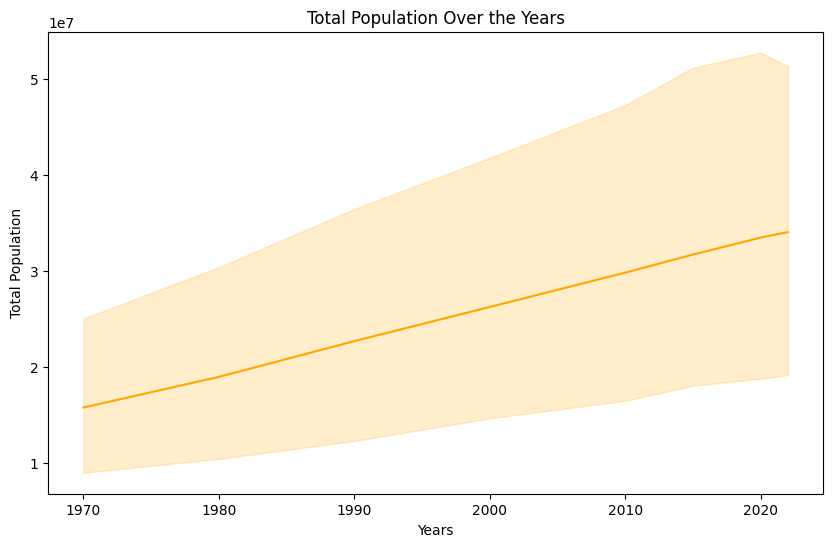

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Years', y='Total_Pop', data=df_melt, color='orange')
plt.title('Total Population Over the Years')
plt.xlabel('Years')
plt.ylabel('Total Population')
plt.show()


The line plot shows a steady increase in the total population over time, reflecting global population growth. This growth trend suggests that population continues to rise across the years, potentially influenced by factors like improved healthcare, lower mortality rates, and higher birth rates. There are no noticeable dips, indicating consistent growth. Population increase can be linked to higher demands on resources and infrastructure globally.

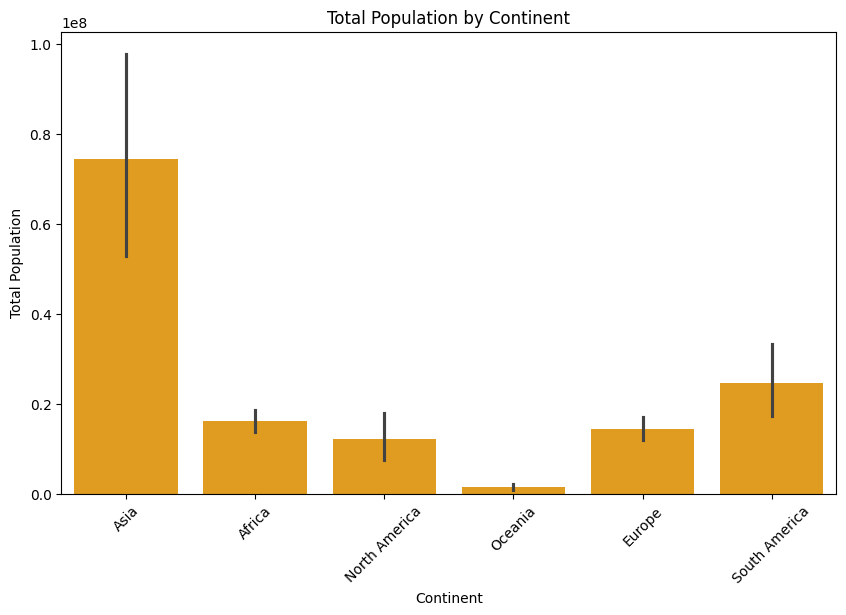

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Continent', y='Total_Pop', data=df_melt, color='orange')
plt.title('Total Population by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Population')
plt.xticks(rotation=45)
plt.show()


This bar plot shows the distribution of total population by continent. Asia clearly stands out with the highest population, followed by Africa and Europe. North and South America have relatively lower populations, while Oceania shows the smallest population. The population dominance of Asia can be attributed to large countries such as China and India.

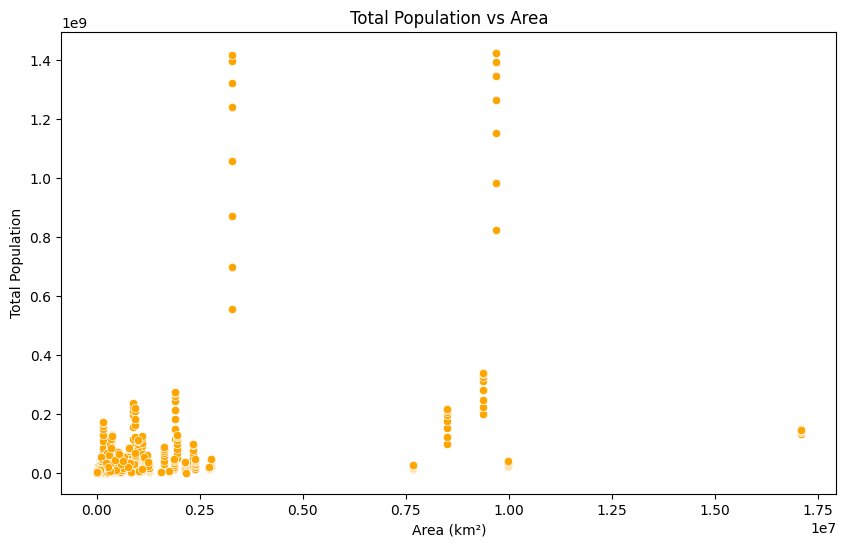

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area (km²)', y='Total_Pop', data=df_melt, color='orange')
plt.title('Total Population vs Area')
plt.xlabel('Area (km²)')
plt.ylabel('Total Population')
plt.show()


The scatter plot shows that there is no direct correlation between a country’s area and its total population. Some small countries (in terms of land area) can have large populations, such as highly urbanized countries, while larger countries may have relatively smaller populations. This highlights that geographic size doesn’t directly determine population size; instead, other factors like urbanization, infrastructure, and resource availability play a significant role

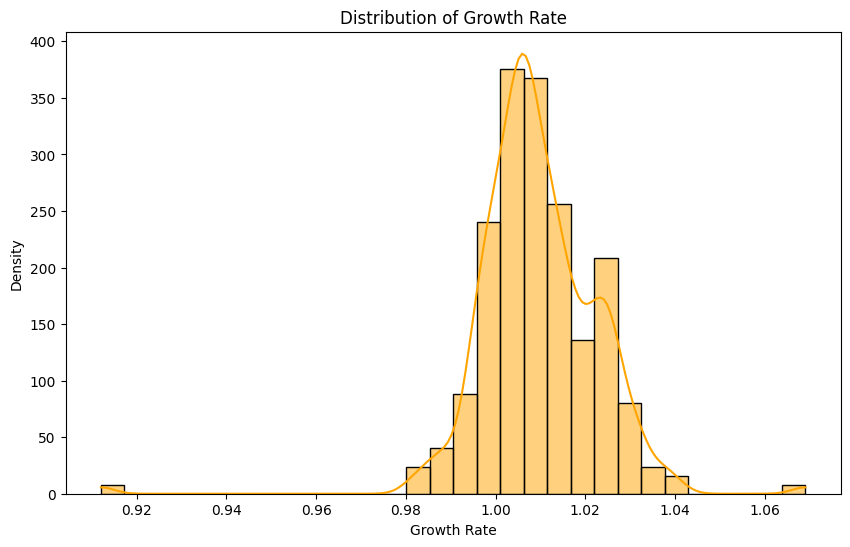

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_melt['Growth Rate'], kde=True, bins=30, color='orange')
plt.title('Distribution of Growth Rate')
plt.xlabel('Growth Rate')
plt.ylabel('Density')
plt.show()


The normal distribution chart shows that the growth rate distribution is left-skewed, meaning most countries experience moderate to high growth rates, while a smaller number of countries have much lower or even negative growth rates. This skewness suggests that while many countries are growing steadily, there are a few outliers with declining populations, possibly due to aging demographics, lower birth rates, or emigration. The left tail indicates that population shrinkage or stagnation is concentrated in certain countries, likely those with advanced economies or countries facing significant socio-economic challenges.

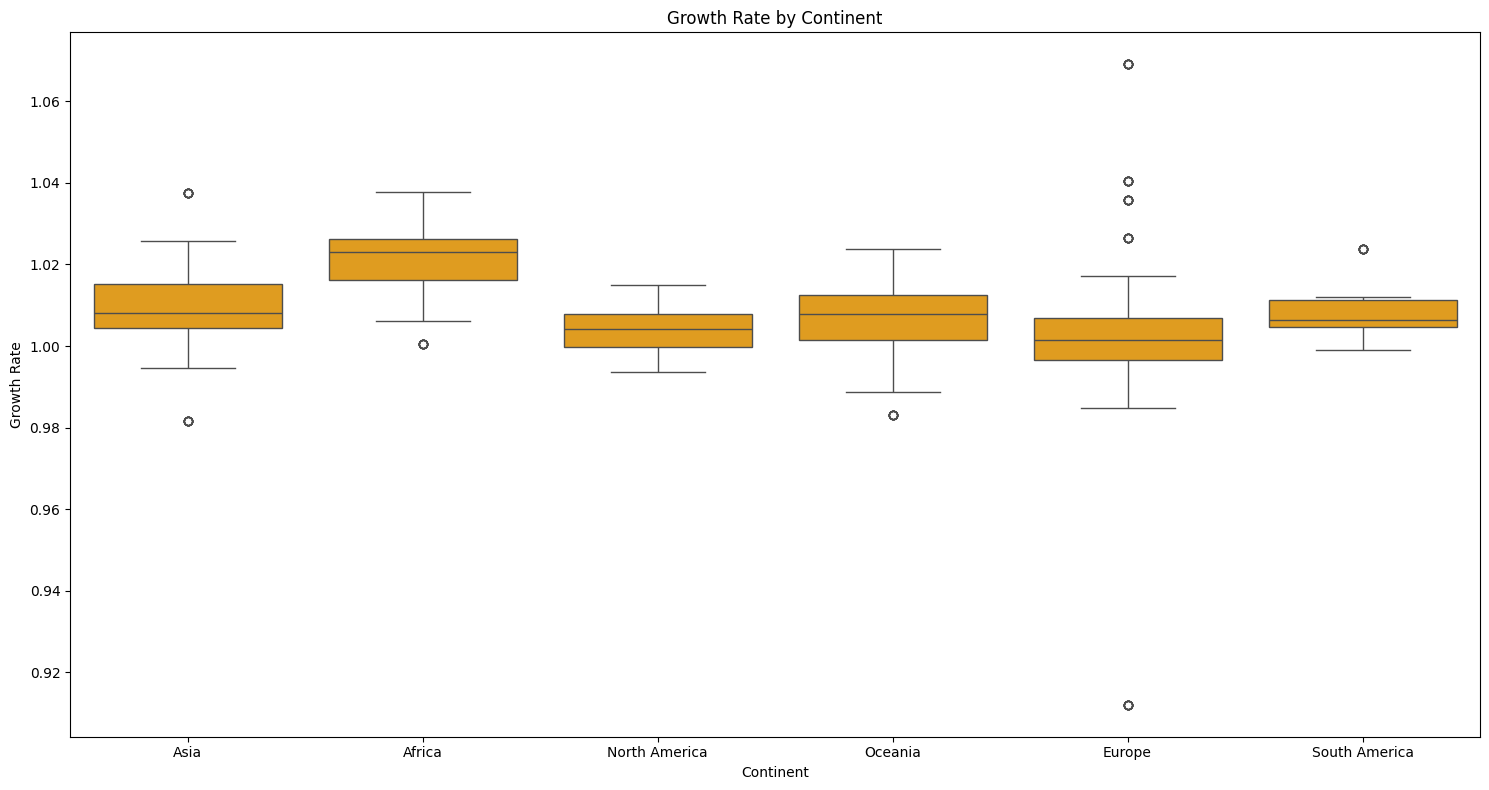

In [ ]:
plt.figure(figsize=(15,8))
box_plot = sns.boxplot(df_melt, x='Continent', y='Growth Rate', color = 'orange')
box_plot.axes.set_title('Growth Rate by Continent')
plt.tight_layout()
plt.show()

The box plot indicates that Africa has the highest median growth rate, followed by Asia, while Europe exhibits the lowest. North America and Oceania show similar median growth rates, positioned between these extremes. The wider interquartile range in Africa suggests significant variability in growth rates among its countries. This variability may be influenced by socio-economic factors, such as differences in government policies, access to resources, and healthcare. Overall, these patterns highlight the complex dynamics driving population growth across different regions.

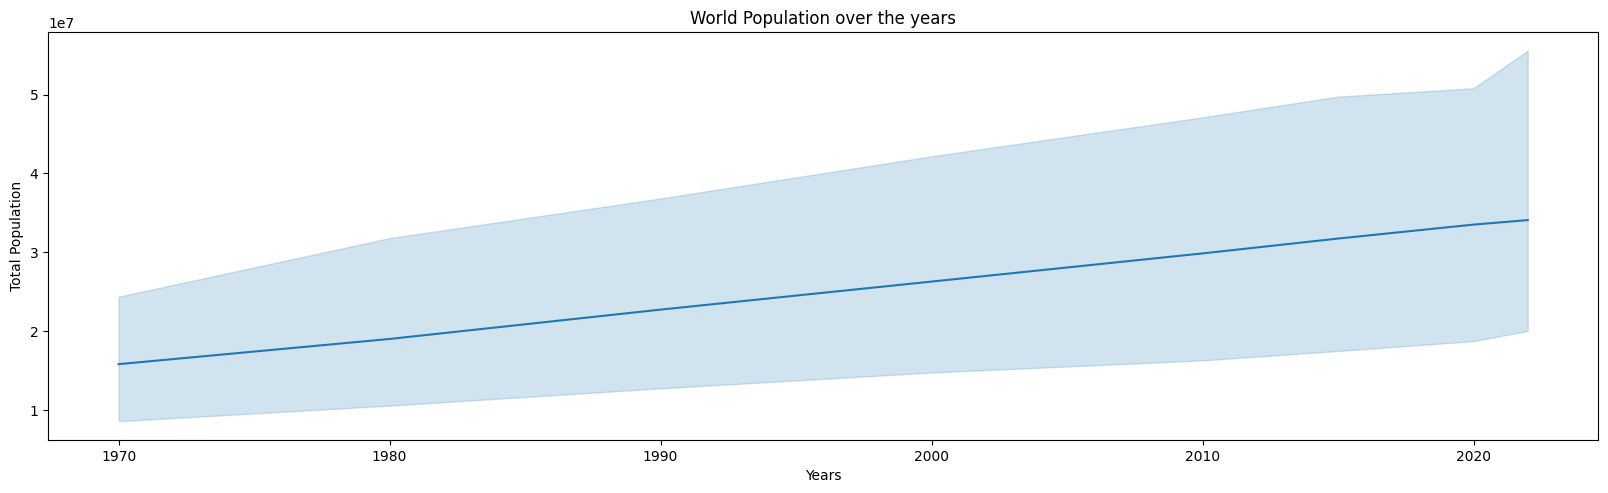

In [ ]:
plt.figure(figsize=(20, 18))

linechart = plt.subplot(3, 1, 1)
sns.lineplot( x='Years', y='Total_Pop', data=df_melt, ax=linechart)
linechart.set_title('World Population over the years')
plt.xlabel('Years')
plt.ylabel('Total Population')
plt.show()

In [ ]:
years = [1970, 2020]
for year in years:
  total_pop = df_melt[df_melt['Years'] == year]['Total_Pop'].sum()
  print(f'Total population in {year}: {total_pop}')

Total population in 1970: 3694136661
Total population in 2020: 7839250603


The line chart depicts the world population growth from 1970 to 2022. During this period, the population has shown a consistent upward trend, increasing from approximately 3.7 billion in 1970 to over 7.9 billion in 2022. This significant growth can be attributed to advancements in healthcare, improved living standards, and increased food production, which have collectively reduced mortality rates and enhanced life expectancy.

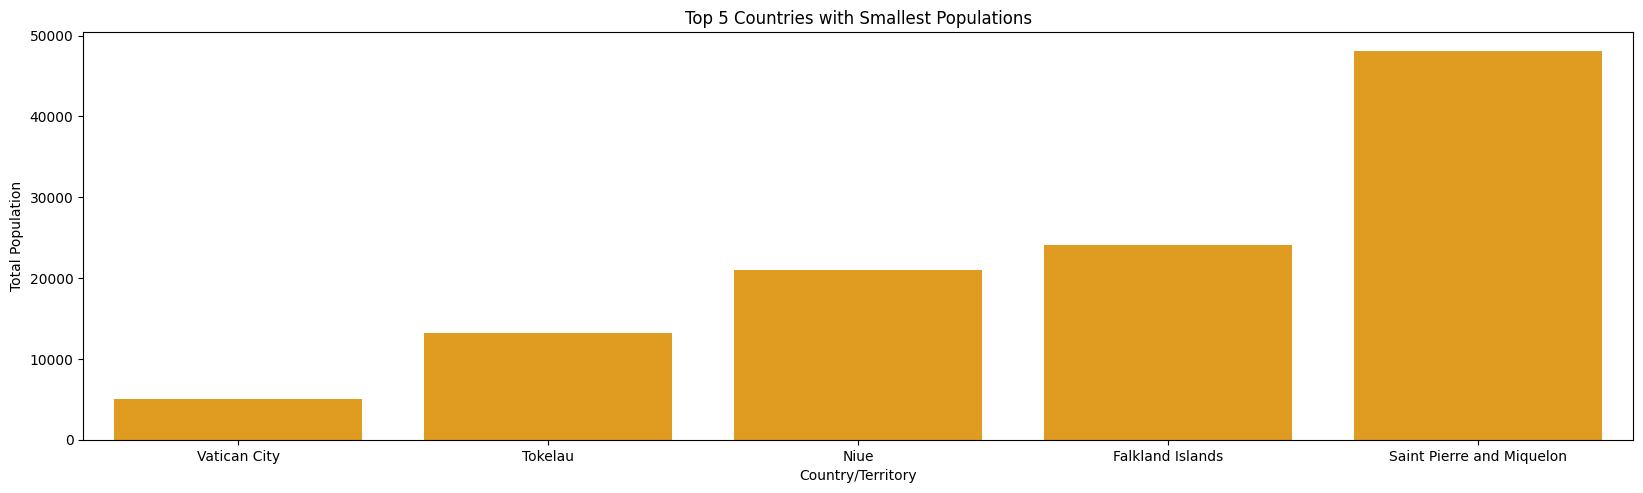

In [ ]:
plt.figure(figsize=(20, 18))

barchart = plt.subplot(3,1,1)
country_populations = df_melt.groupby('Country/Territory')['Total_Pop'].sum()
top_5_countries = country_populations.nsmallest(5)
sns.barplot(x=top_5_countries.index, y=top_5_countries.values, ax=barchart, color="orange")
barchart.set_title('Top 5 Countries with Smallest Populations')
plt.xlabel('Country/Territory')
plt.ylabel('Total Population')
plt.show()

In [ ]:
countries = ['Vatican City', 'Tokelau', 'Niue', 'Falkland Islands', 'Saint Pierre and Miquelon']

for country in countries:
  population = df_melt[df_melt['Country/Territory'] == country]['Total_Pop'].sum()
  print(f'Population of {country}: {population}')

Population of Vatican City: 5026
Population of Tokelau: 13215
Population of Niue: 20964
Population of Falkland Islands: 24048
Population of Saint Pierre and Miquelon: 48039


The countries with the smallest population are Vatican City, Tokelau, Niue, Falkland Islands, and Saint Pierre & Miquelon. These figures may be attributed to geographical isolation, limited resources, and specific cultural or political factors that affect migration and settlement.

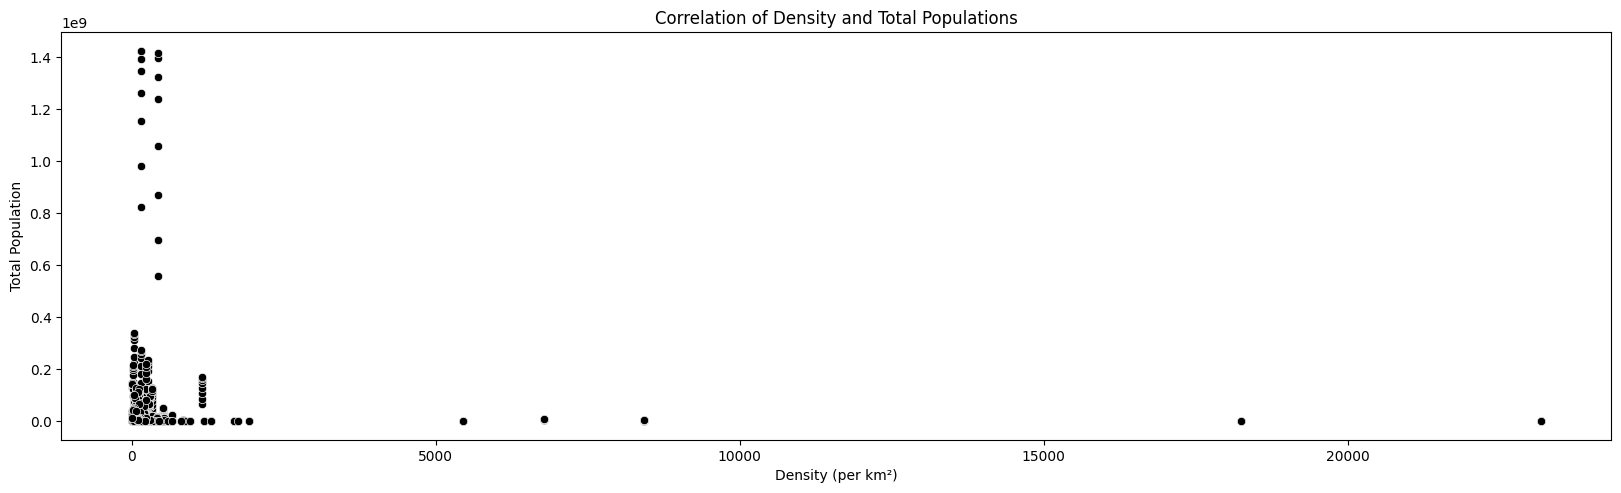

In [ ]:
plt.figure(figsize=(20, 18))

scatterplot = plt.subplot(3, 1, 3)
sns.scatterplot( x='Density (per km²)', y = 'Total_Pop', data=df_melt, color='black', ax=scatterplot)
scatterplot.set_title('Correlation of Density and Total Populations')
plt.xlabel('Density (per km²)')
plt.ylabel('Total Population')
plt.show()

The scatter plot examines the relationship between population density (measured in people per square kilometer) and total population across various countries. While one might anticipate a positive correlation—where higher population densities correspond to larger total populations—this visualization reveals a more complex relationship. For instance, countries like Bangladesh exhibit high density with significant populations, while others, like the Falkland Islands, have low density and small populations. This suggests that factors such as geographic size, urbanization, and economic conditions play crucial roles in shaping these dynamics.

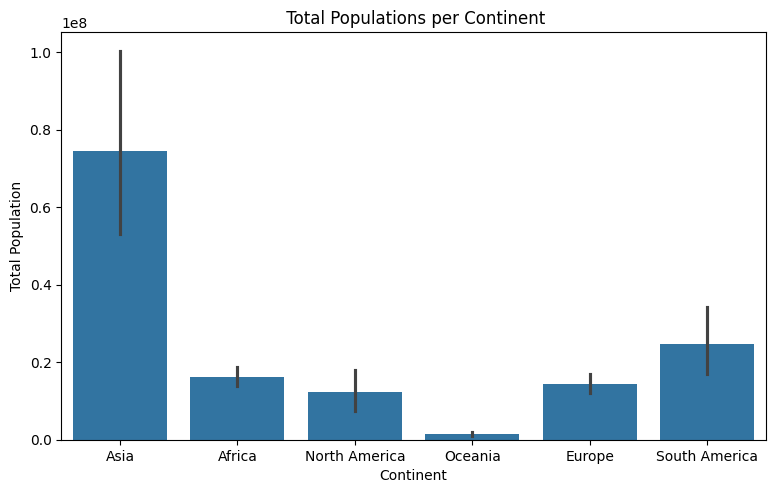

In [ ]:
plt.figure(figsize=(20, 18))

barchart2 = plt.subplot(3, 2, 4)
sns.barplot( x='Continent', y='Total_Pop', data=df_melt)
barchart2.set_title(' Total Populations per Continent')
plt.xlabel('Continent')
plt.ylabel('Total Population')
plt.show()

The bar chart illustrates the total populations of each continent, highlighting the disparities in population sizes across different regions. Asia has the largest population, significantly outpacing other continents, which can be attributed to densely populated countries like China and India. In contrast, Oceania has the smallest population, reflecting its smaller land area and fewer large nations. The data suggests that continents such as Africa and Europe have substantial populations as well, but they remain lower than that of Asia. This distribution underscores the varying demographic challenges and opportunities that each continent faces in terms of resource management and development strategies.
